In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

2024-03-10 09:54:36.291479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 09:54:36.291619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 09:54:36.470265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


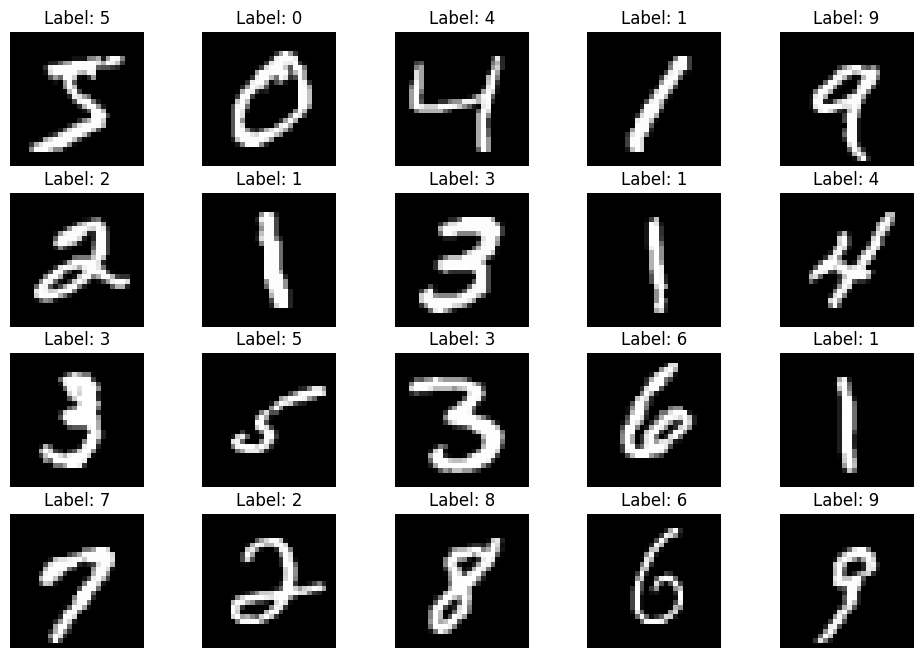

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Visualize some digits
num_rows = 4
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(12, 8))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i].argmax()}')
    plt.axis('off')

plt.show()

6265


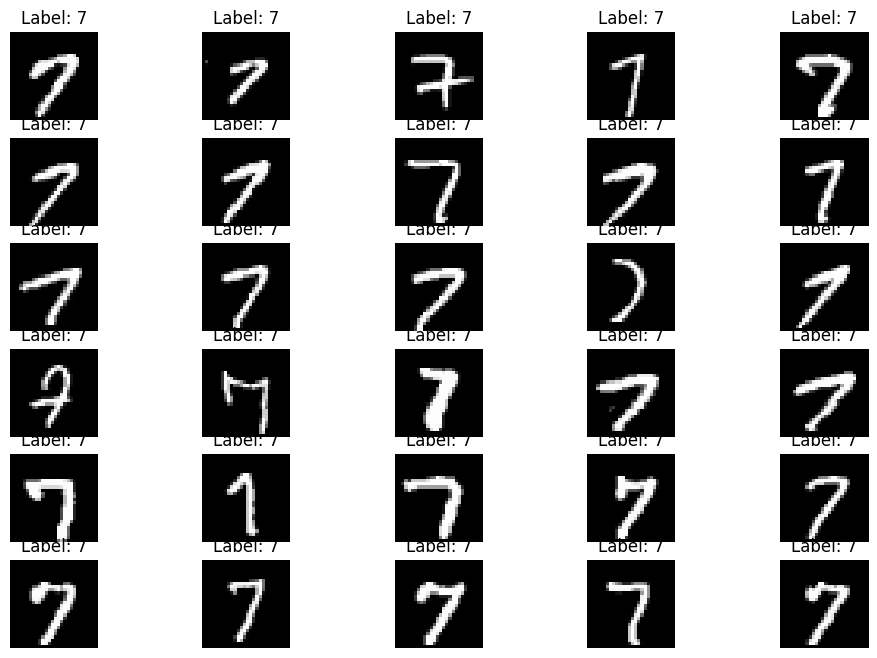

In [3]:
seven_indices = [i for i, label in enumerate(train_labels) if label[7] == 1]
print(len(seven_indices))

num_rows = 6
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(12, 8))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[seven_indices[i]], cmap='gray')
    plt.title('Label: 7')
    plt.axis('off')

plt.show()

In [4]:
model = models.Sequential()

# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9892 - val_loss: 0.0430
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9852 - val_loss: 0.0503
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9884 - val_loss: 0.0446
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9975 - loss: 0.0083 - val_accuracy: 0.9898 - val_loss: 0.0401
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9847 - val_loss: 0.0606


In [10]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print(f'Test accuracy: {test_acc}')
print(f'Test loss:{test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9826 - loss: 0.0624
Test accuracy: 0.986299991607666
Test loss:0.05059590935707092


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


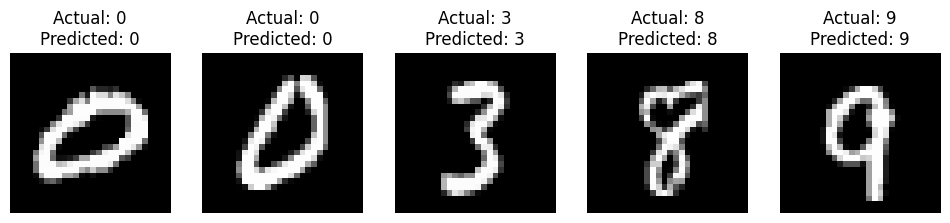

In [11]:
num_images_to_visualize = 5
random_indices = np.random.choice(len(test_images), num_images_to_visualize)

# Make predictions for the selected test images
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, num_images_to_visualize, i)
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f'Actual: {np.argmax(test_labels[index])}\nPredicted: {np.argmax(predictions[index])}')
    plt.axis('off')

plt.show()


In [13]:
from PIL import Image
digits_path = 'examples'
seven_v2_path = digits_path+'/seven-v2.jpg'  
seven_v2_img = Image.open(seven_v2_path).convert('L') 
seven_v2_img = seven_v2_img.resize((28, 28))
seven_v2_img_array = np.array(seven_v2_img) / 255.0
seven_v2_img_array = seven_v2_img_array.reshape(1, 28, 28, 1)


seven_v3_path = digits_path+'/seven-v3.jpg'  
seven_v3_img = Image.open(seven_v3_path).convert('L') 
seven_v3_img = seven_v3_img.resize((28, 28))
seven_v3_img_array = np.array(seven_v3_img) / 255.0
seven_v3_img_array = seven_v3_img_array.reshape(1, 28, 28, 1)

seven_path = digits_path+'/seven.jpg'  
seven_img = Image.open(seven_path).convert('L') 
seven_img = seven_img.resize((28, 28))
seven_img_array = np.array(seven_img) / 255.0
seven_img_array = seven_img_array.reshape(1, 28, 28, 1)

three_path = digits_path+'/three.jpg'  
three_img = Image.open(three_path).convert('L') 
three_img = three_img.resize((28, 28))
three_img_array = np.array(three_img) / 255.0
three_img_array = three_img_array.reshape(1, 28, 28, 1)

three_v2_path = digits_path+'/three-v2.jpg'  
three_v2_img = Image.open(three_v2_path).convert('L') 
three_v2_img = three_v2_img.resize((28, 28))
three_v2_img_array = np.array(three_v2_img) / 255.0
three_v2_img_array = three_v2_img_array.reshape(1, 28, 28, 1)


As the dataset had the examples of sevens written with no horizontal line, the model does not recognize sevens that do have it as sevens (illustration below)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


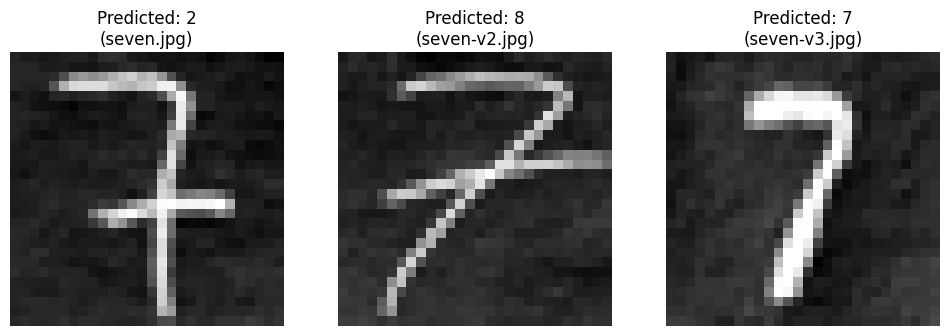

In [15]:
image_arrays = [seven_img_array,seven_v2_img_array, seven_v3_img_array]
image_paths = [digits_path+'/seven.jpg',digits_path+'/seven-v2.jpg',
               digits_path+'/seven-v3.jpg']

plt.figure(figsize=(12, 6))

for i, (image_array, image_path) in enumerate(zip(image_arrays, image_paths), 1):
    plt.subplot(1, len(image_arrays), i)
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    predicted_class = np.argmax(model.predict(image_array))
    plt.title(f'Predicted: {predicted_class}\n({image_path.split("/")[-1]})')
    plt.axis('off')

plt.show()


The example of a particular case below. Possible reasons that prevent the three on the right to be recognized as a three can be poor picture quality and lack of examples for this kind of handwriting.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


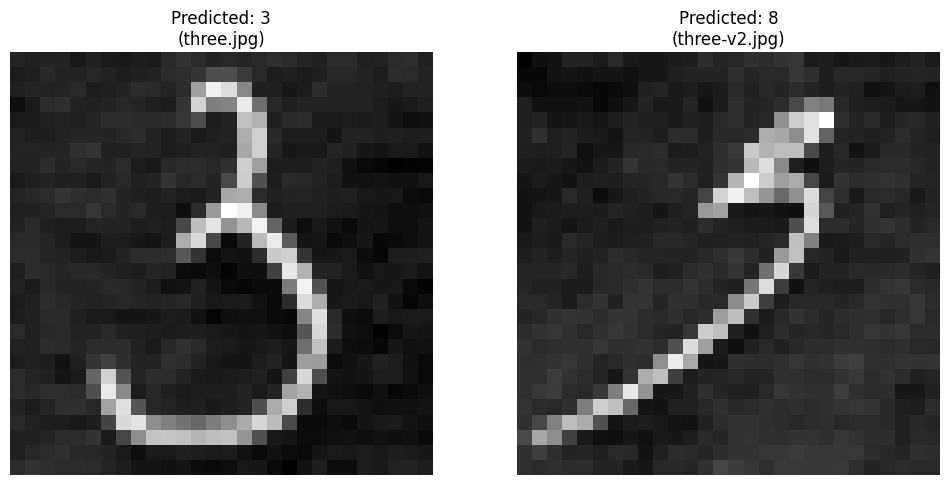

In [16]:
image_arrays = [three_img_array, three_v2_img_array]
image_paths = [digits_path+'/three.jpg', digits_path+'/three-v2.jpg']

plt.figure(figsize=(12, 6))

for i, (image_array, image_path) in enumerate(zip(image_arrays, image_paths), 1):
    plt.subplot(1, len(image_arrays), i)
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    predicted_class = np.argmax(model.predict(image_array))
    plt.title(f'Predicted: {predicted_class}\n({image_path.split("/")[-1]})')
    plt.axis('off')

plt.show()